In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
data = pd.read_csv("./dataset/airbnb.csv", header=0)
data["Place type"] = data["Place type"].astype("str")
data["Room type"] = data["Room type"].astype("str")
data["Price/night (SGD)"] = data["Price/night (SGD)"].str.replace(",", "").str.replace("$", "").astype("int")
data["Total Price (SGD)"] = data["Total Price (SGD)"].str.replace(",", "").str.replace("$", "").astype("int") # format $1,374 to 1374
data["Rating"] = data["Rating"].replace("New", np.nan).astype(float)
data[["Cleanliness Rating", "Accuracy Rating", "Check-in Rating", "Communication Rating", "Location Rating", "Value Rating"]] = data[["Cleanliness Rating", "Accuracy Rating", "Check-in Rating", "Communication Rating", "Location Rating", "Value Rating"]].replace(0, np.nan).astype(float) # remove later


# print(data.isna().sum())
null_mask = data.isna().any(axis=1)

# print(data.dtypes)
# data.describe() # numerical
data.describe(exclude="number") # categorical


,Place type,Room type,Location,Superhost,Host Reviews,Amenities,Link
count,273,273,273,273,269,273,273
unique,2,15,37,2,146,265,273
top,Entire home,Flat,Bangkok,True,6522,"['Bath', 'Hair dryer', 'Shampoo', 'Conditioner...",https://www.airbnb.com.sg/rooms/64853810074638...
freq,256,134,37,170,8,3,1


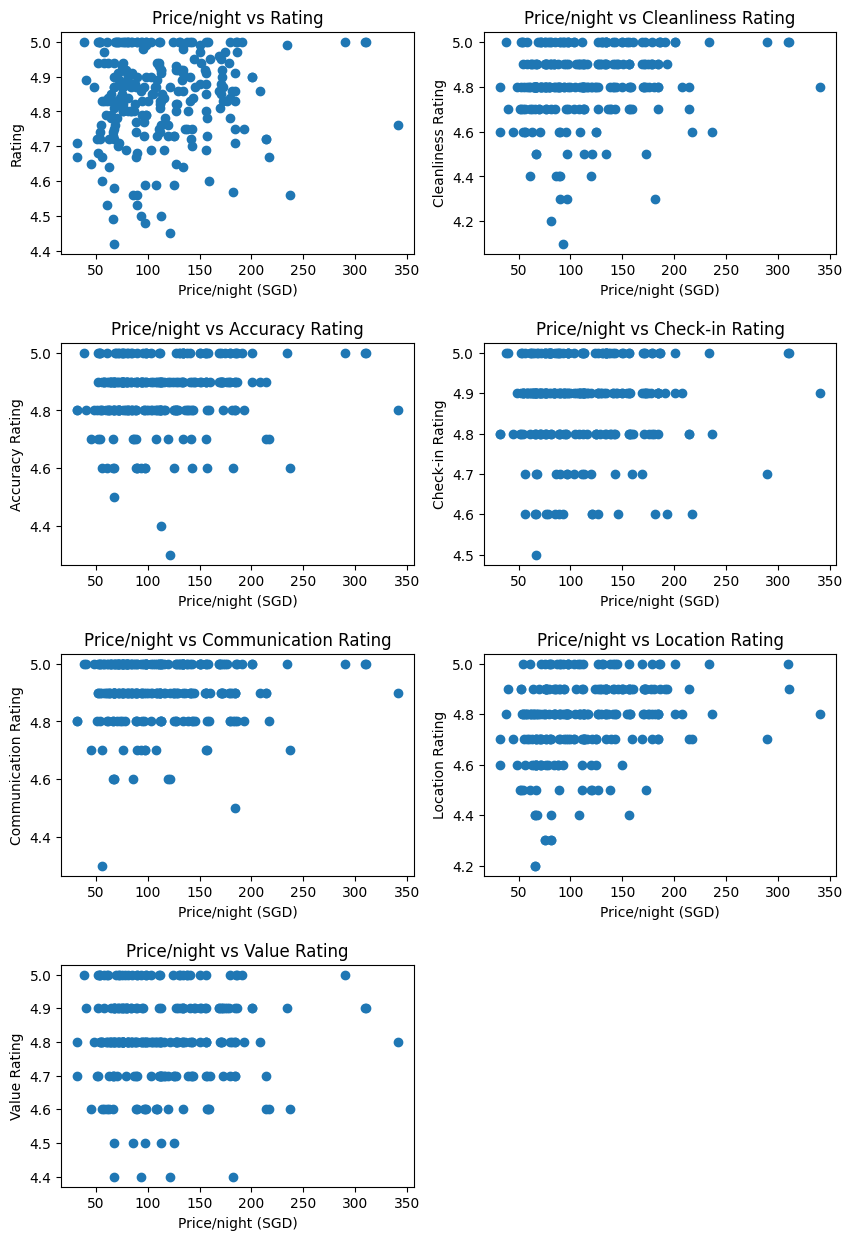

In [41]:
n = 7
col = 2
fig, axs = plt.subplots(n//2+1, col, figsize = (10,15))
axs = axs.flatten()
columns = ["Rating", "Cleanliness Rating", "Accuracy Rating", "Check-in Rating", "Communication Rating", "Location Rating", "Value Rating"]
for x in range(len(columns)):
    axs[x].scatter(data["Price/night (SGD)"], data[columns[x]])
    axs[x].set_xlabel("Price/night (SGD)")
    axs[x].set_ylabel(columns[x])
    axs[x].set_title(f"Price/night vs {columns[x]}")

# Turn off the unused subplot
for i in range(len(columns), len(axs)):
    axs[i].axis("off")
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

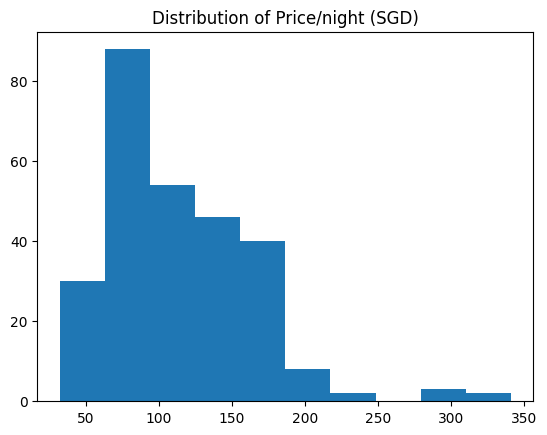

In [119]:
plt.hist(data["Price/night (SGD)"])
plt.title("Distribution of Price/night (SGD)")
plt.show()

Text(0.5, 0.98, '')

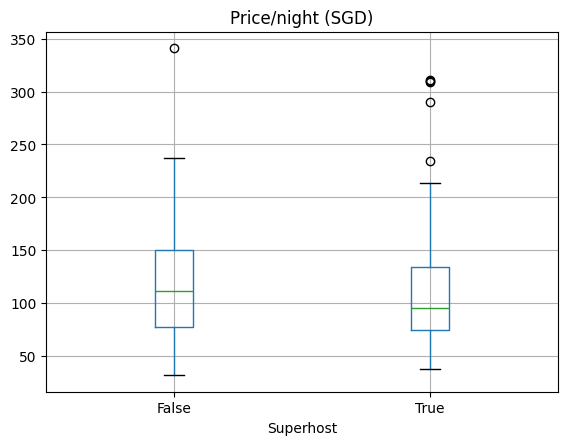

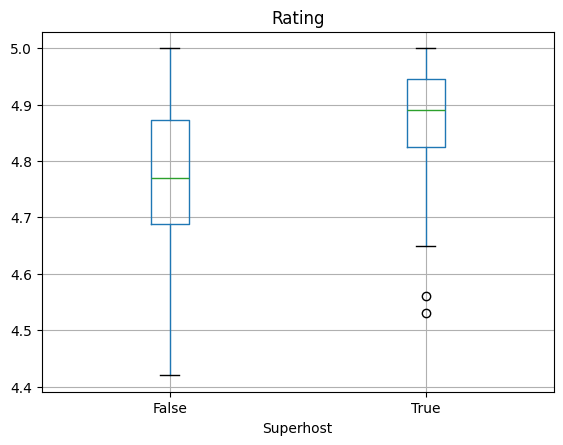

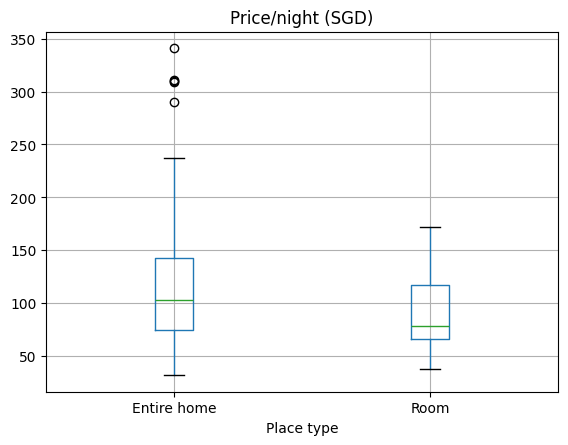

In [120]:
data.boxplot(column="Price/night (SGD)", by="Superhost")
plt.suptitle("")
data.boxplot(column="Rating", by="Superhost")
plt.suptitle("")

data.boxplot(column="Price/night (SGD)", by="Place type")
plt.suptitle("")

The boxplot suggests no correlation between the price of listings and whether if the host is a Superhost. However, Superhosts tend to have a higher rating than normal hosts.

Generally, the prices for a room is cheaper than than of an entire home

c:\Users\piers\PythonProjects\WebScraper\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\piers\PythonProjects\WebScraper\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\piers\PythonProjects\WebScraper\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\piers\PythonProjects\WebScraper\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\piers\PythonProjects\WebScraper\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\piers\PythonProjects\WebScraper\ven

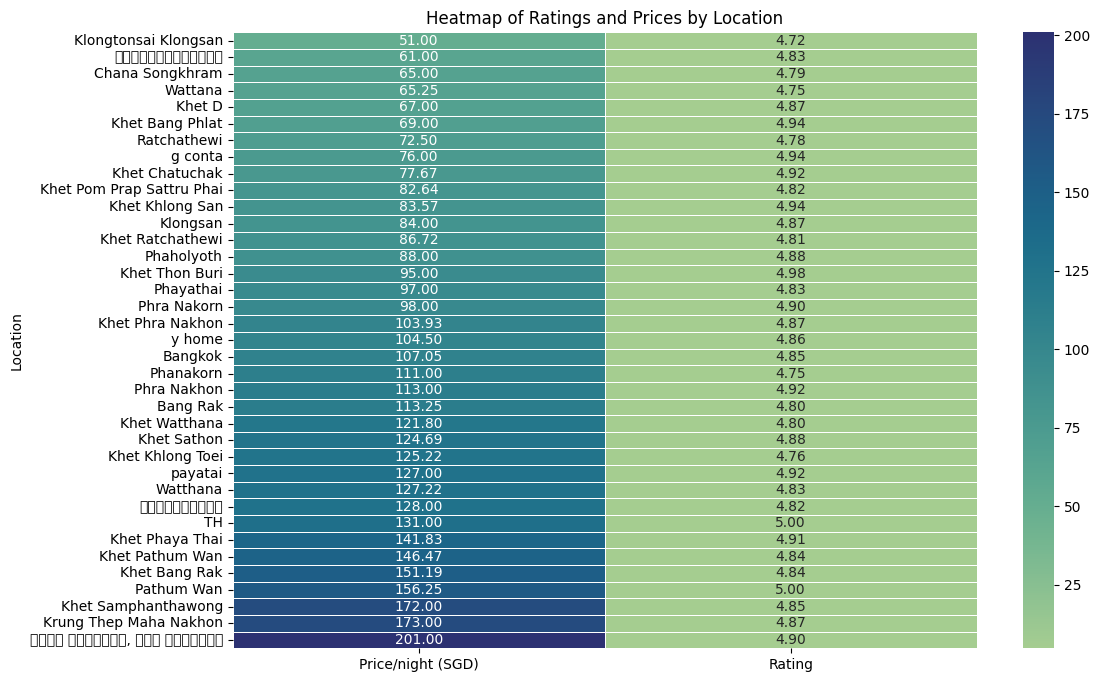

In [116]:
ratingAndPrice_by_location = data.groupby('Location').agg({"Rating":"mean","Price/night (SGD)":"mean"})
heatmap_data = ratingAndPrice_by_location.pivot_table(index='Location', values=['Rating', 'Price/night (SGD)']).sort_values(by="Price/night (SGD)")
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='crest', fmt=".2f", linewidths=.5)

plt.title('Heatmap of Ratings and Prices by Location')
plt.show()